In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_outlier_treated.csv')

In [7]:
df.head()

property_type             society     sector  price  price_per_sqft    area  \
0          flat  supertech araville  sector 79   0.71          5521.0  1286.0   
1          flat       pioneer araya  sector 62   9.95         20996.0  4739.0   
2         house         independent  sector 82   7.00         21605.0  3240.0   
3          flat  vipul world floors  sector 48   4.30         13871.0  3100.0   
4          flat         godrej aria  sector 79   1.30          9623.0  1351.0   

                                        areaWithType  bedRoom  bathroom  \
0                 Built Up area: 1295 (120.31 sq.m.)        2         2   
1  Super Built up area 4739(440.27 sq.m.)Carpet a...        4         6   
2                        Plot area 360(301.01 sq.m.)        4         4   
3                      Carpet area: 3100 (288 sq.m.)        4         5   
4             Super Built up area 1351(125.51 sq.m.)        2         4   

  balcony  floorNum      facing       agePossession  super_built_up_area  \
0       0       9.0         NaN  Under Construction                  NaN   
1       3      12.0  South-East      Relatively New               4739.0   
2      3+       1.0  North-East      Relatively New                  NaN   
3      3+       4.0        East        New Property                  NaN   
4       2       3.0        East      Relatively New               1351.0   

   built_up_area  carpet_area  study room  servant room  store room  \
0         1295.0          NaN           0             0           0   
1            NaN       3219.0           0             1           0   
2          360.0          NaN           1             1           0   
3            NaN       3100.0           1             1           0   
4            NaN          NaN           0             0           0   

   pooja room  others  furnishing_type  luxury_score  area_room_ratio  
0           0       0                1             0           643.00  
1           1       0                0           138          1184.75  
2           1       0                0            49           810.00  
3           1       0                1            88           775.00  
4           0       0                1            53           675.50

In [9]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1968
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

### Built up area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

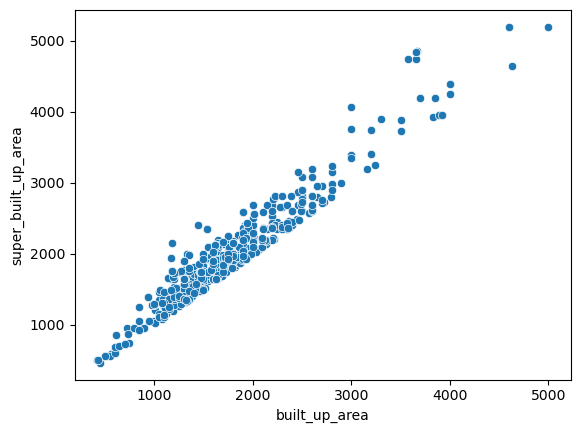

In [12]:
sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

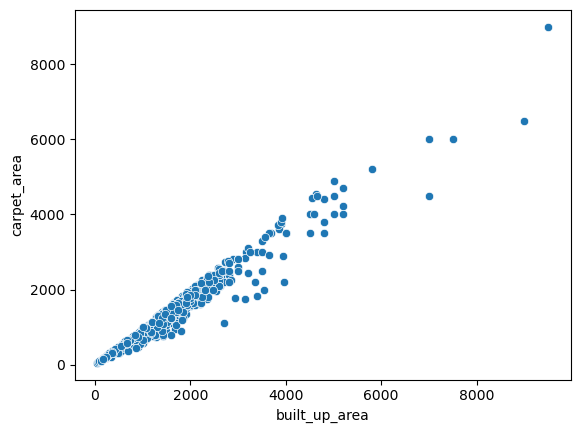

In [14]:
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'])

In [16]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3550    False
3551    False
3552    False
3553    False
3554    False
Length: 3555, dtype: bool

In [18]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [20]:
all_present_df.shape

(531, 24)

In [22]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [24]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [26]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [28]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [30]:
sbc_df.head()

property_type                  society      sector  price  price_per_sqft  \
1           flat            pioneer araya   sector 62   9.95         20996.0   
20          flat             corona optus  sector 37c   1.25          7176.0   
27          flat             corona optus  sector 37c   1.25          8929.0   
28          flat  shree vardhman victoria   sector 70   1.50          7692.0   
51          flat            m3m woodshire  sector 107   1.15          7497.0   

      area                                       areaWithType  bedRoom  \
1   4739.0  Super Built up area 4739(440.27 sq.m.)Carpet a...        4   
20  1742.0  Super Built up area 1735(161.19 sq.m.)Carpet a...        3   
27  1400.0  Super Built up area 1735(161.19 sq.m.)Carpet a...        3   
28  1950.0  Super Built up area 1950(181.16 sq.m.)Carpet a...        3   
51  1534.0  Super Built up area 1534(142.51 sq.m.)Carpet a...        2   

    bathroom balcony  floorNum      facing   agePossession  \
1          6       3      12.0  South-East  Relatively New   
20         3       3       2.0  North-West  Relatively New   
27         3       3       2.0  South-East  Relatively New   
28         5       3       7.0       South  Relatively New   
51         2       3       0.0  North-East  Relatively New   

    super_built_up_area  built_up_area  carpet_area  study room  servant room  \
1                4739.0            NaN       3219.0           0             1   
20               1735.0            NaN       1400.0           1             0   
27               1735.0            NaN       1400.0           1             0   
28               1950.0            NaN       1161.0           0             1   
51               1534.0            NaN       1056.0           1             0   

    store room  pooja room  others  furnishing_type  luxury_score  \
1            0           1       0                0           138   
20           0           0       0                1            49   
27           0           0       0                1            49   
28           0           0       0                0           174   
51           0           0       0                1            29   

    area_room_ratio  
1       1184.750000  
20       580.666667  
27       466.666667  
28       650.000000  
51       767.000000

In [34]:
sbc_df['built_up_area']=sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2))

C:\Users\rubha\AppData\Local\Temp\ipykernel_14924\1782490702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['built_up_area']=sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2))


In [36]:
sbc_df['built_up_area']

1       3933.0
20      1563.0
27      1563.0
28      1527.0
51      1281.0
         ...  
3519    1640.0
3529    1244.0
3538    1644.0
3540    1201.0
3542    2366.0
Name: built_up_area, Length: 421, dtype: float64

In [38]:
df.update(sbc_df)

In [40]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1547
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [42]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [44]:
sb_df.head()

property_type               society      sector  price  price_per_sqft  \
4           flat           godrej aria   sector 79   1.30          9623.0   
7           flat     indiabulls enigma  sector 110   3.30          9851.0   
9           flat        vipul belmonte   sector 53   6.00         24490.0   
11          flat         m3m woodshire  sector 107   1.40          5930.0   
12          flat  emaar mgf palm hills   sector 77   1.64          8410.0   

      area                            areaWithType  bedRoom  bathroom balcony  \
4   1351.0  Super Built up area 1351(125.51 sq.m.)        2         4       2   
7   3350.0  Super Built up area 3350(311.23 sq.m.)        4         5       3   
9   2450.0  Super Built up area 2450(227.61 sq.m.)        3         4      3+   
11  2361.0  Super Built up area 2361(219.34 sq.m.)        3         4       0   
12  1950.0  Super Built up area 1950(181.16 sq.m.)        4         3       3   

    floorNum      facing   agePossession  super_built_up_area  built_up_area  \
4        3.0        East  Relatively New               1351.0            NaN   
7        7.0        East  Relatively New               3350.0            NaN   
9        6.0  North-West  Moderately Old               2450.0            NaN   
11       1.0        East    New Property               2361.0            NaN   
12       9.0       South  Relatively New               1950.0            NaN   

    carpet_area  study room  servant room  store room  pooja room  others  \
4           NaN           0             0           0           0       0   
7           NaN           0             1           0           0       0   
9           NaN           0             1           0           0       1   
11          NaN           0             0           0           0       0   
12          NaN           0             1           0           0       0   

    furnishing_type  luxury_score  area_room_ratio  
4                 1            53       675.500000  
7                 1           101       837.500000  
9                 0            26       816.666667  
11                1            67       787.000000  
12                1           102       487.500000

In [46]:
sb_df['built_up_area']=sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105))

C:\Users\rubha\AppData\Local\Temp\ipykernel_14924\1280886374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area']=sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105))


In [48]:
df.update(sb_df)

In [50]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area           672
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [52]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [54]:
c_df.head()

property_type                     society      sector  price  \
3           flat          vipul world floors   sector 48   4.30   
8          house                 independent    sector 2   5.00   
13          flat               malibu towers   sector 47   2.45   
18          flat            woodstock floors   sector 50   1.05   
32          flat  signature global grand iva  sector 103   0.30   

    price_per_sqft    area                       areaWithType  bedRoom  \
3          13871.0  3100.0      Carpet area: 3100 (288 sq.m.)        4   
8          15385.0  3250.0   Carpet area: 3250 (301.93 sq.m.)        6   
13         10699.0  2290.0   Carpet area: 2290 (212.75 sq.m.)        3   
18         10628.0   988.0     Carpet area: 988 (91.79 sq.m.)        2   
32          8287.0   362.0  Carpet area: 361.88 (33.62 sq.m.)        1   

    bathroom balcony  floorNum facing   agePossession  super_built_up_area  \
3          5      3+       4.0   East    New Property                  NaN   
8          6       2       1.0  South       Undefined                  NaN   
13         4       2       1.0    NaN    Old Property                  NaN   
18         2       2       2.0  North  Moderately Old                  NaN   
32         2       2       5.0    NaN    New Property                  NaN   

    built_up_area  carpet_area  study room  servant room  store room  \
3             NaN  3100.000000           1             1           0   
8             NaN  3250.000000           0             0           0   
13            NaN  2290.000000           1             0           0   
18            NaN   988.000000           0             0           0   
32            NaN   361.882318           0             0           0   

    pooja room  others  furnishing_type  luxury_score  area_room_ratio  
3            1       0                1            88       775.000000  
8            0       0                1             0       541.666667  
13           0       0                0            42       763.333333  
18           0       0                1            53       494.000000  
32           0       0                1            37       362.000000

In [56]:
c_df['built_up_area']=c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9))

C:\Users\rubha\AppData\Local\Temp\ipykernel_14924\582643393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area']=c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9))


In [58]:
df.update(c_df)

In [60]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area             0
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

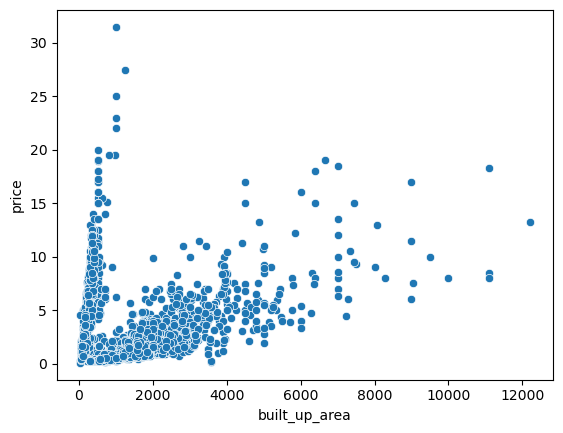

In [64]:
# sns.scatterplot(df['built_up_area'],df['price'])
sns.scatterplot(x='built_up_area', y='price', data=df)

In [66]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [68]:
anamoly_df.sample(5)

price    area  built_up_area
2787  11.30  4500.0          480.0
2968   5.15  2727.0          302.0
1793   7.25  2475.0          275.0
876    5.88  2160.0          240.0
162    2.57  1630.0         1811.0

In [70]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [72]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

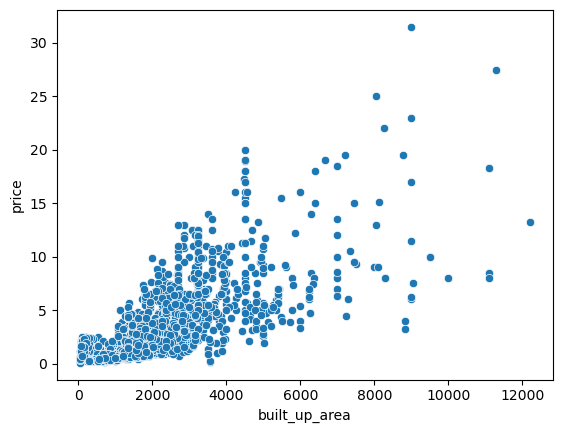

In [76]:
sns.scatterplot(x='built_up_area', y='price', data=df)

In [78]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [80]:
df.head()

property_type             society     sector  price  price_per_sqft  \
0          flat  supertech araville  sector 79   0.71          5521.0   
1          flat       pioneer araya  sector 62   9.95         20996.0   
2         house         independent  sector 82   7.00         21605.0   
3          flat  vipul world floors  sector 48   4.30         13871.0   
4          flat         godrej aria  sector 79   1.30          9623.0   

   bedRoom  bathroom balcony  floorNum      facing       agePossession  \
0        2         2       0       9.0         NaN  Under Construction   
1        4         6       3      12.0  South-East      Relatively New   
2        4         4      3+       1.0  North-East      Relatively New   
3        4         5      3+       4.0        East        New Property   
4        2         4       2       3.0        East      Relatively New   

   built_up_area  study room  servant room  store room  pooja room  others  \
0         1295.0           0             0           0           0       0   
1         3933.0           0             1           0           1       0   
2         3240.0           1             1           0           1       0   
3         3444.0           1             1           0           1       0   
4         1223.0           0             0           0           0       0   

   furnishing_type  luxury_score  
0                1             0  
1                0           138  
2                0            49  
3                1            88  
4                1            53

In [82]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### floorNum

In [85]:
df[df['floorNum'].isnull()]

property_type                  society             sector  price  \
241          house       vipul tatvam villa          sector 48   8.50   
328          house              independent           sector 3   1.50   
502          house              independent          sector 24   1.45   
825          house       vipul tatvam villa          sector 48   8.50   
872          house        ansal sushant lok          sector 43  10.50   
1271          flat                      NaN          sector 78   0.60   
1308         house              independent           sector 4   4.12   
1335         house              independent          sector 26   4.60   
1550         house              independent           sector 2   5.60   
1847         house              independent           sector 7   6.50   
2137         house     dlf new town heights          sector 86   2.47   
2302         house              independent          sector 25  13.00   
2360         house              independent           sector 4   0.65   
2807         house       emaar mgf marbella          sector 66   9.00   
2820          flat       experion heartsong  dwarka expressway   1.08   
3265         house               jacob pura          sector 12   0.35   
3349         house  ansal sushant lok plots          sector 43   3.30   

      price_per_sqft  bedRoom  bathroom balcony  floorNum      facing  \
241          26235.0        4         4       2       NaN        East   
328          10288.0        3         3       0       NaN         NaN   
502           2984.0        3         3       1       NaN         NaN   
825          26235.0        4         4       1       NaN         NaN   
872          27911.0        4         4       2       NaN  North-East   
1271          3692.0        2         2       0       NaN         NaN   
1308          8889.0        2         1      3+       NaN         NaN   
1335         12198.0        4         4      3+       NaN         NaN   
1550         17284.0        8         6      3+       NaN  South-West   
1847         15046.0        3         2      3+       NaN         NaN   
2137          7719.0        4         4      3+       NaN        West   
2302         45710.0        6         8      3+       NaN         NaN   
2360         11111.0        4         2       2       NaN         NaN   
2807         21251.0        4         4      3+       NaN  South-West   
2820          6150.0        3         3       0       NaN         NaN   
3265          9722.0        2         1       0       NaN         NaN   
3349         26570.0        1         1       0       NaN         NaN   

           agePossession  built_up_area  study room  servant room  store room  \
241       Moderately Old         3240.0           0             1           1   
328         Old Property          210.0           0             0           0   
502         Old Property           60.0           0             0           0   
825       Relatively New         3240.0           0             0           0   
872         Old Property         3762.0           0             1           0   
1271  Under Construction         1625.0           0             0           0   
1308      Moderately Old         4635.0           0             0           0   
1335        Old Property         3771.0           0             0           0   
1550      Moderately Old         3240.0           1             1           1   
1847        Old Property         4320.0           0             0           0   
2137      Moderately Old         2800.0           0             1           0   
2302      Relatively New         2844.0           1             1           1   
2360      Moderately Old           65.0           0             0           0   
2807      Relatively New         5200.0           0             1           1   
2820  Under Construction         1758.0           0             0           0   
3265        Old Property          360.0           0             0           0  

In [87]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [91]:
df['floorNum']=df['floorNum'].fillna(2.0)

In [93]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [95]:
1011/df.shape[0]

0.2843881856540084

### facing

<Axes: ylabel='count'>

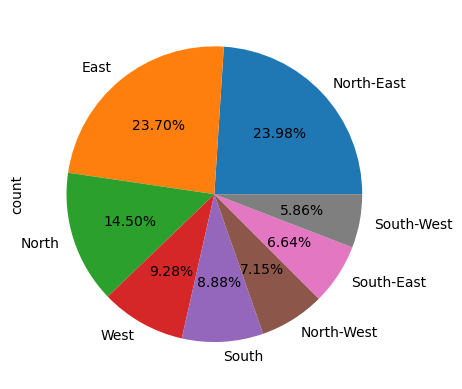

In [98]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [100]:
df.drop(columns=['facing'],inplace=True)

In [102]:
df.sample(5)

property_type                               society      sector  price  \
3401         house                        uppal southend   sector 49   4.40   
2877          flat  shapoorji pallonji joyville gurugram  sector 102   1.42   
1136          flat                    sare crescent parc   sector 92   1.44   
1391          flat                puri diplomatic greens  sector 111   3.45   
3135          flat      emaar mgf emerald floors premier   sector 65   2.90   

      price_per_sqft  bedRoom  bathroom balcony  floorNum   agePossession  \
3401         15278.0        6         6       3       3.0  Moderately Old   
2877         10380.0        2         2       3      14.0       Undefined   
1136          7069.0        4         4       3       8.0  Relatively New   
1391         11695.0        4         5      3+       9.0  Relatively New   
3135         14684.0        4         4       0       0.0  Relatively New   

      built_up_area  study room  servant room  store room  pooja room  others  \
3401         2880.0           1             1           1           1       0   
2877         1368.0           0             0           0           0       0   
1136         2267.0           0             0           0           0       0   
1391         2670.0           0             1           0           0       0   
3135         2194.0           0             0           1           0       0   

      furnishing_type  luxury_score  
3401                2           110  
2877                1             0  
1136                1            37  
1391                1            68  
3135                1            50

In [104]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [120]:
df[df['society'].isnull()]

property_type society     sector  price  price_per_sqft  bedRoom  \
1271          flat     NaN  sector 78    0.6          3692.0        2   

      bathroom balcony  floorNum       agePossession  built_up_area  \
1271         2       0       2.0  Under Construction         1625.0   

      study room  servant room  store room  pooja room  others  \
1271           0             0           0           0       0   

      furnishing_type  luxury_score  
1271                1             0

In [122]:
df.drop(index=[1271],inplace=True)

In [124]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### agePossession

In [126]:
df['agePossession'].value_counts()

agePossession
Relatively New        1605
New Property           557
Moderately Old         545
Old Property           293
Undefined              291
Under Construction     263
Name: count, dtype: int64

In [128]:
df[df['agePossession'] == 'Undefined']

property_type                                  society      sector  \
8            house                              independent    sector 2   
14           house                              independent   sector 28   
24            flat                        hcbs sports ville  sohna road   
38            flat                  sobha smriti apartments   sector 56   
55            flat                            conscient one  sector 109   
...            ...                                      ...         ...   
3506         house                              independent   sector 12   
3508         house                              independent    sector 3   
3510          flat           signature global infinity mall   sector 36   
3518          flat                           m3m golfestate   sector 79   
3531          flat  sare crescent parc royal greens phase 1   sector 92   

      price  price_per_sqft  bedRoom  bathroom balcony  floorNum  \
8      5.00         15385.0        6         6       2       1.0   
14     4.50         13889.0        4         4       0       4.0   
24     0.29          3973.0        2         2       1       4.0   
38     0.50          8333.0        1         1       2       3.0   
55     1.70         17617.0        1         1       2       9.0   
...     ...             ...      ...       ...     ...       ...   
3506   0.90         13333.0        2         4       0       2.0   
3508   0.68          3875.0        5         3       0       1.0   
3510   0.41          6269.0        2         2       3       3.0   
3518   1.40         10000.0        2         2       2       4.0   
3531   0.50          5000.0        2         2       3       2.0   

     agePossession  built_up_area  study room  servant room  store room  \
8        Undefined         3611.0           0             0           0   
14       Undefined         3240.0           0             0           0   
24       Undefined          743.0           0             0           0   
38       Undefined          667.0           0             0           0   
55       Undefined          965.0           0             0           0   
...            ...            ...         ...           ...         ...   
3506     Undefined          675.0           0             0           0   
3508     Undefined         1755.0           0             0           0   
3510     Undefined          654.0           0             0           0   
3518     Undefined         1556.0           1             1           1   
3531     Undefined         1000.0           0             0           0   

      pooja room  others  furnishing_type  luxury_score  
8              0       0                1             0  
14             0       0                1             0  
24             0       0                1             0  
38             0       0                1             0  
55             0       0                1             0  
...          ...     ...              ...           ...  
3506           0       0                1             0  
3508           0       0                1             0  
3510           0       0                1             0  
3518           0       0                2            83  
3531           0       0                1             0  

[291 rows x 18 columns]

In [130]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [132]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [134]:
df['agePossession'].value_counts()

agePossession
Relatively New        1717
New Property           597
Moderately Old         584
Old Property           326
Under Construction     277
Undefined               53
Name: count, dtype: int64

In [136]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [138]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [140]:
df['agePossession'].value_counts()

agePossession
Relatively New        1726
New Property           598
Moderately Old         591
Old Property           329
Under Construction     277
Undefined               33
Name: count, dtype: int64

In [142]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [144]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [146]:
df['agePossession'].value_counts()

agePossession
Relatively New        1728
Moderately Old         622
New Property           598
Old Property           329
Under Construction     277
Name: count, dtype: int64

In [148]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [150]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [152]:
df.shape

(3554, 18)